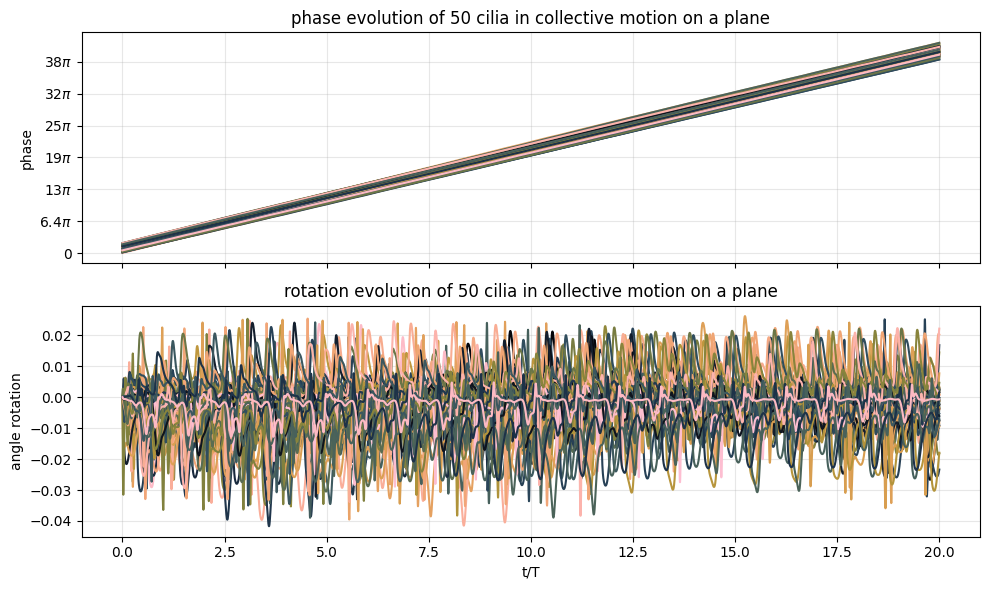

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import cmcrameri.cm as cmc

num_fils = 50  # Number of filaments

path = f'../data/plane_emergent_random_{num_fils}fils/20250714/ciliate_{num_fils}fil_9000blob_8.00R_0.1000torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

data = np.loadtxt(path)
time = data[:, 0] / 500.0
phases = data[:, 2:num_fils+2]
angle_rotations = data[:, num_fils+2:num_fils*2+2]

def multiple_pi_formatter(x, pos):
  frac = x / np.pi
  if np.isclose(frac, 0):
    return "0"
  elif np.isclose(frac, 1):
    return r"$\pi$"
  elif np.isclose(frac, -1):
    return r"$-\pi$"
  elif np.isclose(frac, 2):
    return r"$2\pi$"
  elif np.isclose(frac, -2):
    return r"$-2\pi$"
  else:
    return r"${0:.2g}\pi$".format(frac)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

colors = cmc.batlowKS(np.linspace(0, 1, num_fils))

# Plot all phases on the first subplot
for i in range(phases.shape[1]):
    ax1.plot(time, phases[:, i], linestyle='-', color=colors[i])

ax1.set_ylabel('phase')
ax1.set_title(f'phase evolution of {num_fils} cilia in collective motion on a plane')
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(FuncFormatter(multiple_pi_formatter))

# Plot all angle rotations on the second subplot
for i in range(angle_rotations.shape[1]):
    ax2.plot(time, angle_rotations[:, i], linestyle='-', color=colors[i])

ax2.set_xlabel('t/T')
ax2.set_ylabel('angle rotation')
ax2.set_title(f'rotation evolution of {num_fils} cilia in collective motion on a plane')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

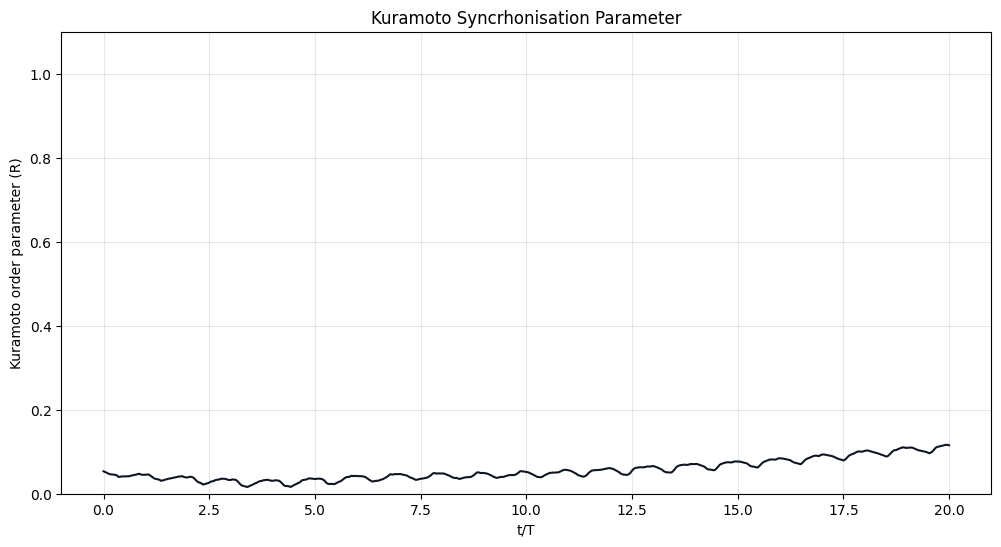

In [13]:
# Calculate Kuramoto order parameter
kuramoto_order = np.abs(np.mean(np.exp(1j * phases), axis=1))

# Plot Kuramoto order parameter
fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.plot(time, kuramoto_order, color=cmc.batlowKS(0.5))
ax3.set_xlabel('t/T')
ax3.set_ylabel('Kuramoto order parameter (R)')
ax3.set_title('Kuramoto Syncrhonisation Parameter')
ax3.set_ylim(0, 1.1)
ax3.grid(True, alpha=0.3)
plt.show()

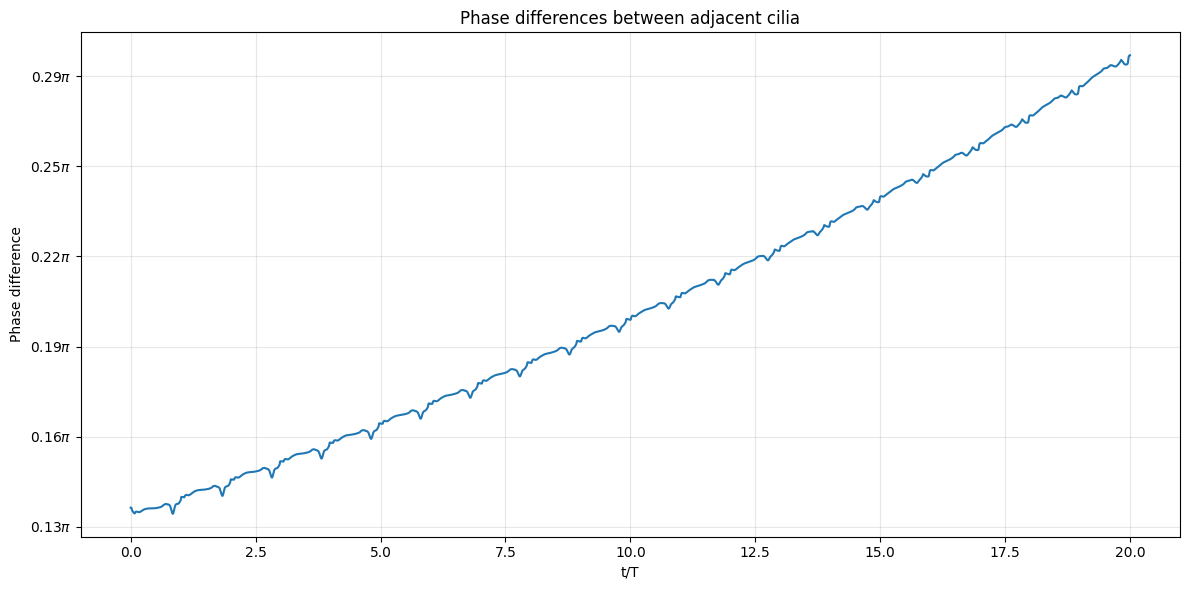

In [ ]:
# Calculate phase differences between adjacent filaments
phase_diffs = np.diff(phases, axis=1)

# Create a new figure for phase differences
fig, ax4 = plt.subplots(figsize=(12, 6))

colors = cmc.batlowKS(np.linspace(0, 1, phase_diffs.shape[1]))
# Plot all phase differences
for i in range(phase_diffs.shape[1]):
    ax4.plot(time, phase_diffs[:, i], linestyle='-', color=colors[i])

ax4.set_xlabel('t/T')
ax4.set_ylabel('Phase difference')
ax4.set_title('Phase differences between adjacent cilia')
ax4.yaxis.set_major_formatter(FuncFormatter(multiple_pi_formatter))
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()